### **Importing Datasets.**

In [1]:
import pandas as pd

Loading data

In [2]:
fear_greed = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /fear_greed_index.csv")
trader_data = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /historical_data.csv")

A look at the bitcoin market sentiment dataset.

In [3]:
print("Fear & Greed Index Dataset:")
print(fear_greed.head(10))
print(fear_greed.info())

Fear & Greed Index Dataset:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
5  1517895000      8   Extreme Fear  2018-02-06
6  1517981400     36           Fear  2018-02-07
7  1518067800     30           Fear  2018-02-08
8  1518154200     44           Fear  2018-02-09
9  1518240600     54        Neutral  2018-02-10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


A look at the historic trader dataset.

In [4]:
print("Historic trader Dataset:")
print(trader_data.head(10))
print(trader_data.info())

Historic trader Dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9900   
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9934   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BU

Checking if there are any missing values in bitcoin market sentiment dataset.

In [5]:
print("Missing Values - bitcoin market sentiment dataset:")
print(fear_greed.isnull().sum(), "\n")

Missing Values - bitcoin market sentiment dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64 



Checking if there are any missing values in historic trader dataset.

In [6]:
print("Missing Values - historic trader:")
print(trader_data.isnull().sum(), "\n")

Missing Values - historic trader:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64 



Checking duplicates in both dataset.

In [7]:
print("Duplicates - Fear & Greed:", fear_greed.duplicated().sum())
print("Duplicates - Trader Data:", trader_data.duplicated().sum(), "\n")

Duplicates - Fear & Greed: 0
Duplicates - Trader Data: 0 



**Fear & Greed data**

In [8]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')

In [9]:
print("Fear & Greed Index time range:", fear_greed['date'].min(), "to", fear_greed['date'].max())

Fear & Greed Index time range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [10]:
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], errors='coerce')
print("Trader Data time range:", trader_data['Timestamp'].min(), "to", trader_data['Timestamp'].max())

Trader Data time range: 1970-01-01 00:28:00 to 1970-01-01 00:29:10


Converting timestamp to proper datetime.

In [11]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
fear_greed['timestamp'] = pd.to_datetime(fear_greed['timestamp'], unit='s', errors='coerce')

In [12]:
import pandas as pd

# Load again if needed
fear_greed = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /fear_greed_index.csv")

# 1. Convert timestamp/date to datetime
# Dataset has both `timestamp` (UNIX epoch) and `date` (string). We'll standardize.
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
fear_greed['timestamp'] = pd.to_datetime(fear_greed['timestamp'], unit='s', errors='coerce')

# Set `date` as the main datetime index
fear_greed = fear_greed.set_index('date').sort_index()

# 2. Ensure 'value' is numeric
fear_greed['value'] = pd.to_numeric(fear_greed['value'], errors='coerce')

# Check after conversion
print(fear_greed.dtypes)
print(fear_greed.head())

timestamp         datetime64[ns]
value                      int64
classification            object
dtype: object
                     timestamp  value classification
date                                                
2018-02-01 2018-02-01 05:30:00     30           Fear
2018-02-02 2018-02-02 05:30:00     15   Extreme Fear
2018-02-03 2018-02-03 05:30:00     40           Fear
2018-02-04 2018-02-04 05:30:00     24   Extreme Fear
2018-02-05 2018-02-05 05:30:00     11   Extreme Fear


In [13]:
import pandas as pd

# Load trader data
trader_data = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /historical_data.csv")

# Convert timestamps (adjust to your actual column names)
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], errors='coerce')

# Inspect min/max and a few samples
print("Time range:", trader_data['Timestamp'].min(), "to", trader_data['Timestamp'].max())
print("Sample timestamps:\n", trader_data['Timestamp'].head(20))

# Check unique time formats (seconds, minutes, daily)
print("Unique hours count:", trader_data['Timestamp'].dt.hour.nunique())
print("Unique minutes count:", trader_data['Timestamp'].dt.minute.nunique())

Time range: 1970-01-01 00:28:00 to 1970-01-01 00:29:10
Sample timestamps:
 0    1970-01-01 00:28:50
1    1970-01-01 00:28:50
2    1970-01-01 00:28:50
3    1970-01-01 00:28:50
4    1970-01-01 00:28:50
5    1970-01-01 00:28:50
6    1970-01-01 00:28:50
7    1970-01-01 00:28:50
8    1970-01-01 00:28:50
9    1970-01-01 00:28:50
10   1970-01-01 00:28:50
11   1970-01-01 00:28:50
12   1970-01-01 00:28:50
13   1970-01-01 00:28:50
14   1970-01-01 00:28:50
15   1970-01-01 00:28:50
16   1970-01-01 00:28:50
17   1970-01-01 00:28:50
18   1970-01-01 00:28:50
19   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]
Unique hours count: 1
Unique minutes count: 2


In [14]:
import pandas as pd

# Load Fear-Greed Index
fear_greed = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /fear_greed_index.csv")

# Convert date column to datetime
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
fear_greed['timestamp'] = pd.to_datetime(fear_greed['timestamp'], unit='s', errors='coerce')

# Ensure value is numeric
fear_greed['value'] = pd.to_numeric(fear_greed['value'], errors='coerce')

# Use 'date' as index for resampling
fear_greed = fear_greed.set_index('date').sort_index()

# Resample hourly (align with trader data granularity)
# fear_greed_hourly = fear_greed.resample('H').mean()

# print("Fear-Greed Index (hourly resampled):")
# print(fear_greed_hourly.head())

In [15]:
# Assuming 'fear_greed' DataFrame has the 'date' or 'timestamp' column set as the index.
# If not, use: fear_greed = fear_greed.set_index('date')
fear_greed_daily = fear_greed['value'].resample('d').mean()

In [16]:
print("Fear-Greed Index (daily resampled):")
print(fear_greed_daily.head(10))

Fear-Greed Index (daily resampled):
date
2018-02-01    30.0
2018-02-02    15.0
2018-02-03    40.0
2018-02-04    24.0
2018-02-05    11.0
2018-02-06     8.0
2018-02-07    36.0
2018-02-08    30.0
2018-02-09    44.0
2018-02-10    54.0
Freq: D, Name: value, dtype: float64


**Trader Data**

Converting timestamp IST to UST

In [17]:
import pandas as pd

# Load trader dataset
trader_data = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /historical_data.csv")

# Convert Timestamp IST to datetime (IST timezone-aware)
trader_data['Timestamp IST'] = pd.to_datetime(
    trader_data['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
).dt.tz_localize('Asia/Kolkata')   # IST = Asia/Kolkata

# Convert IST → UTC
trader_data['Timestamp UTC'] = trader_data['Timestamp IST'].dt.tz_convert('UTC')

print(trader_data[['Timestamp IST', 'Timestamp UTC']].head())

              Timestamp IST             Timestamp UTC
0 2024-12-02 22:50:00+05:30 2024-12-02 17:20:00+00:00
1 2024-12-02 22:50:00+05:30 2024-12-02 17:20:00+00:00
2 2024-12-02 22:50:00+05:30 2024-12-02 17:20:00+00:00
3 2024-12-02 22:50:00+05:30 2024-12-02 17:20:00+00:00
4 2024-12-02 22:50:00+05:30 2024-12-02 17:20:00+00:00


Handling duplicates

In [18]:
# Check duplicates
dup_count = trader_data.duplicated(subset=['Order ID', 'Trade ID']).sum()
print("Duplicate rows found and removed:", dup_count)

# Drop duplicates
trader_data = trader_data.drop_duplicates(subset=['Order ID', 'Trade ID'])

Duplicate rows found and removed: 4878


Data Cleaning and Initial Inspection

In [19]:
# Ensure numeric
trader_data['Closed PnL'] = pd.to_numeric(trader_data['Closed PnL'], errors='coerce')
trader_data['Size USD'] = pd.to_numeric(trader_data['Size USD'], errors='coerce')

# Basic check
print(trader_data[['Closed PnL', 'Size USD']].describe())

          Closed PnL      Size USD
count  206346.000000  2.063460e+05
mean       48.095060  5.542173e+03
std       920.324362  3.597538e+04
min   -117990.104100  0.000000e+00
25%         0.000000  1.935600e+02
50%         0.000000  5.936350e+02
75%         5.634331  2.050637e+03
max    135329.090100  3.921431e+06


Feature Engineering

In [20]:
# Profitability flag
trader_data['is_profitable'] = (trader_data['Closed PnL'] > 0).astype(int)

# Normalized return
trader_data['normalized_return'] = trader_data['Closed PnL'] / trader_data['Size USD']

# Handle div by zero
trader_data['normalized_return'] = trader_data['normalized_return'].replace([float('inf'), -float('inf')], 0)

print(trader_data[['Closed PnL', 'Size USD', 'is_profitable', 'normalized_return']].head(50))

     Closed PnL  Size USD  is_profitable  normalized_return
0      0.000000   7872.16              0           0.000000
1      0.000000    127.68              0           0.000000
2      0.000000   1150.63              0           0.000000
3      0.000000   1142.04              0           0.000000
4      0.000000     69.75              0           0.000000
5      0.000000     11.27              0           0.000000
6      0.000000   1151.77              0           0.000000
7      0.000000    272.00              0           0.000000
8      0.000000    368.00              0           0.000000
9      0.000000    100.00              0           0.000000
10     0.000000  11706.64              0           0.000000
11     0.000000     57.77              0           0.000000
12     0.000000    794.87              0           0.000000
13     0.000000    227.53              0           0.000000
14     0.000000  14835.57              0           0.000000
15     0.000000    792.71              0

**Merge Datasets**

In [21]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Timestamp UTC,is_profitable,normalized_return
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00+05:30,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 17:20:00+00:00,0,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00+05:30,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 17:20:00+00:00,0,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00+05:30,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 17:20:00+00:00,0,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00+05:30,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 17:20:00+00:00,0,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00+05:30,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 17:20:00+00:00,0,0.0


In [22]:
fear_greed.head()

,timestamp,value,classification
date,,,
2018-02-01,2018-02-01 05:30:00,30,Fear
2018-02-02,2018-02-02 05:30:00,15,Extreme Fear
2018-02-03,2018-02-03 05:30:00,40,Fear
2018-02-04,2018-02-04 05:30:00,24,Extreme Fear
2018-02-05,2018-02-05 05:30:00,11,Extreme Fear


Preparing sentiment(fear-greed) data.

In [23]:
fear_greed_daily = fear_greed['value'].resample('D').mean()
fear_greed_daily = fear_greed_daily.reset_index()

Preparing trader-data

In [24]:
trader_data['Timestamp UTC'] = pd.to_datetime(trader_data['Timestamp UTC'], errors='coerce')
trader_data['trade_date'] = trader_data['Timestamp UTC'].dt.date

Merging trades with sentiment on same dates

In [25]:
print(trader_data['trade_date'].dtype)
print(fear_greed_daily['date'].dtype)

object
datetime64[ns]


In [26]:
import pandas as pd

# Assume fear_greed_index is your original DataFrame
# Prepare fear_greed_daily to include all necessary columns
fear_greed_index = pd.read_csv("/content/drive/MyDrive/ds_neel /csv_files /fear_greed_index.csv")
fear_greed_daily = fear_greed_index[['date', 'value', 'classification']].copy()
fear_greed_daily['date'] = pd.to_datetime(fear_greed_daily['date'])

# Assume trader_data is already prepared and has 'trade_date' as datetime
trader_data['trade_date'] = pd.to_datetime(trader_data['trade_date'])

# Now perform the merge with the updated fear_greed_daily
merged = pd.merge(
    trader_data,
    fear_greed_daily,
    left_on='trade_date',
    right_on='date',
    how='left'
)

# You can now see the 'classification' column in the merged DataFrame
print(merged.head(100))

                                       Account  Coin  Execution Price  \
0   0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1   0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2   0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3   0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4   0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
..                                         ...   ...              ...   
95  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           9.0642   
96  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           9.0613   
97  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           9.0611   
98  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           9.0579   
99  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           9.0571   

    Size Tokens  Size USD  Side             Timestamp IST  Start Position  \
0        986.87   7872.16   BUY 2024-12-02 22:

Greed VS Fear

In [27]:
# Group by sentiment class and calculate average ClosedPnL
avg_pnl_by_sentiment = merged.groupby("classification")["Closed PnL"].mean()

print("Average ClosedPnL by Sentiment Class:")
print(avg_pnl_by_sentiment)

Average ClosedPnL by Sentiment Class:
classification
Extreme Fear     49.759160
Extreme Greed    64.109126
Fear             45.633528
Greed            49.770705
Neutral          32.472293
Name: Closed PnL, dtype: float64


Losses more common when sentiment is extreme?

In [28]:
# Count profitable vs loss-making trades per sentiment class
loss_counts = merged.groupby("classification")["is_profitable"].value_counts(normalize=True).unstack()

print("Profitability ratio by Sentiment Class:")
print(loss_counts)

Profitability ratio by Sentiment Class:
is_profitable          0         1
classification                    
Extreme Fear    0.584903  0.415097
Extreme Greed   0.537779  0.462221
Fear            0.581653  0.418347
Greed           0.610417  0.389583
Neutral         0.640335  0.359665


Distribution analysis (PnL across sentiment classes)

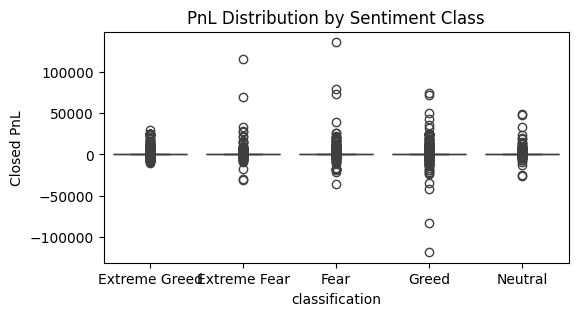

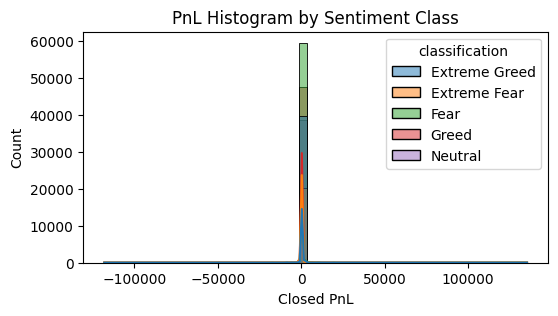

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("PnL Distribution by Sentiment Class")
plt.show()

print("\n")

plt.figure(figsize=(6,3))
sns.histplot(data=merged, x="Closed PnL", hue="classification", kde=True, bins=50)
plt.title("PnL Histogram by Sentiment Class")
plt.show()

Correlation between sentiment value & Closed PnL

Correlation between Sentiment Value and Closed PnL: 0.007959444351191959




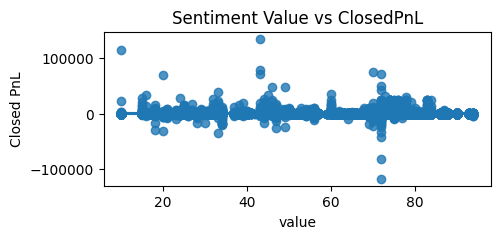

In [30]:
corr = merged["Closed PnL"].corr(merged["value"].astype(float))
print("Correlation between Sentiment Value and Closed PnL:", corr)
print("\n")

# Scatter plot with regression
plt.figure(figsize=(5,2))
sns.regplot(x=merged["value"].astype(float), y=merged["Closed PnL"])
plt.title("Sentiment Value vs ClosedPnL")

plt.show()

Behavioral patterns

Side (Buy/Sell) distribution by Sentiment Class:
Side                 BUY      SELL
classification                    
Extreme Fear    0.467932  0.532068
Extreme Greed   0.456539  0.543461
Fear            0.478712  0.521288
Greed           0.493521  0.506479
Neutral         0.535294  0.464706




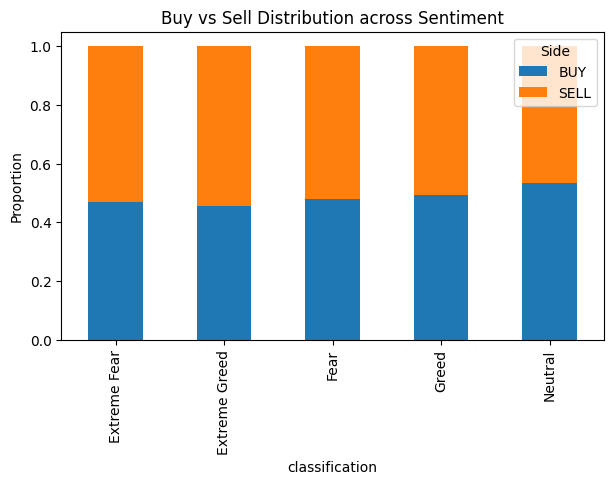

In [31]:
#Long vs Short in different sentiment
side_dist = merged.groupby("classification")["Side"].value_counts(normalize=True).unstack()

print("Side (Buy/Sell) distribution by Sentiment Class:")
print(side_dist)
print("\n")

# Plot
side_dist.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Buy vs Sell Distribution across Sentiment")
plt.ylabel("Proportion")
plt.show()


Trade size Vs Sentiment

Average Trade Size by Sentiment Class:
classification
Extreme Fear     5523.409181
Extreme Greed    3148.643847
Fear             7707.579367
Greed            5463.729197
Neutral          4767.243553
Name: Size USD, dtype: float64




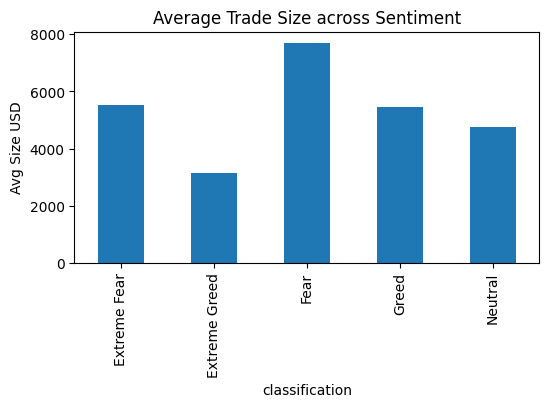

In [32]:
avg_size = merged.groupby("classification")["Size USD"].mean()

print("Average Trade Size by Sentiment Class:")
print(avg_size)
print("\n")
# Plot
avg_size.plot(kind="bar", figsize=(6,3))
plt.title("Average Trade Size across Sentiment")
plt.ylabel("Avg Size USD")
plt.show()

**Advanced analysis**

Hidden Patterns: Clustering

           Closed PnL      value       Size USD
cluster                                        
0           22.934053  51.668448    5247.534439
1           47.658594  51.894985    4839.951533
2        16769.581568  51.149351  679734.178052




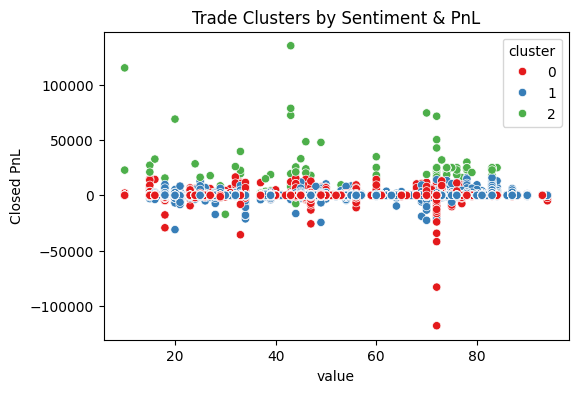

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering
cluster_features = merged[["Closed PnL", "value", "Size USD"]].copy()
cluster_features["Side_flag"] = (merged["Side"] == "BUY").astype(int)  # Encode Side

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged["cluster"] = kmeans.fit_predict(X_scaled)

# Inspect cluster characteristics
print(merged.groupby("cluster")[["Closed PnL", "value", "Size USD"]].mean())
print("\n")
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x=merged["value"], y=merged["Closed PnL"], hue=merged["cluster"], palette="Set1")
plt.title("Trade Clusters by Sentiment & PnL")
plt.show()

Time-series analysis: Lead/Lag

Correlation with same day sentiment: 0.02675728044758757
Correlation with previous day sentiment (lag1): 0.00435896876876968




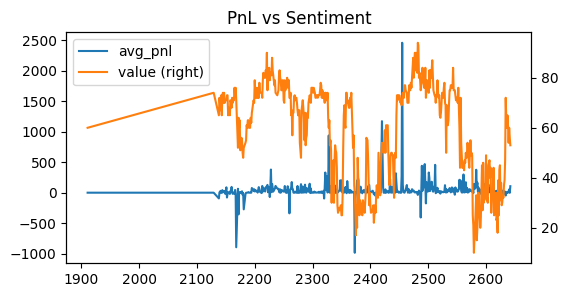

In [34]:
# Daily aggregation of trader profits
daily_pnl = merged.groupby("trade_date")["Closed PnL"].mean().rename("avg_pnl")

# Merge with daily sentiment
ts = pd.merge(daily_pnl, fear_greed_daily, left_index=True, right_on="date", how="left")

# Lag sentiment by 1 day
ts["sentiment_lag1"] = ts["value"].shift(1)

# Correlation lead/lag
print("Correlation with same day sentiment:", ts["avg_pnl"].corr(ts["value"]))
print("Correlation with previous day sentiment (lag1):", ts["avg_pnl"].corr(ts["sentiment_lag1"]))
print("\n")
# Plot
ts[["avg_pnl", "value"]].plot(secondary_y="value", figsize=(6,3), title="PnL vs Sentiment")
plt.show()

Predictive Modeling

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.73      0.60      0.66     36596
           1       0.54      0.67      0.60     25308

    accuracy                           0.63     61904
   macro avg       0.63      0.64      0.63     61904
weighted avg       0.65      0.63      0.63     61904

ROC-AUC: 0.6430139658530308
Random Forest Performance
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     36596
           1       0.76      0.75      0.76     25308

    accuracy                           0.80     61904
   macro avg       0.80      0.79      0.79     61904
weighted avg       0.80      0.80      0.80     61904

ROC-AUC: 0.890032692625261
Feature Importances:
Fee          0.383168
Size USD     0.358014
value        0.186314
Side_flag    0.072504
dtype: float64


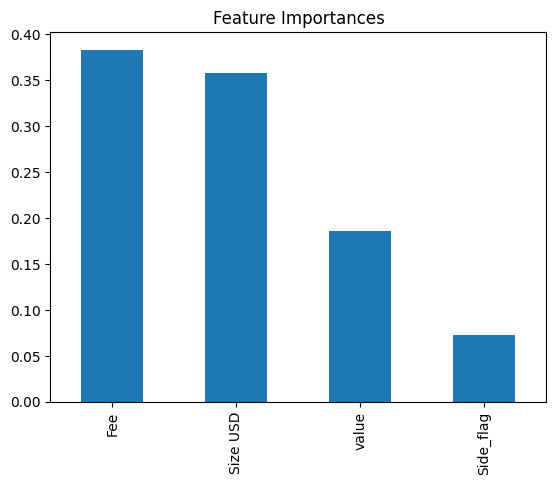

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare features
ml_data = merged.copy()
ml_data["Side_flag"] = (ml_data["Side"] == "BUY").astype(int)

features = ["value", "Size USD", "Fee", "Side_flag"]
X = ml_data[features].astype(float)
y = ml_data["is_profitable"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Feature importance (RF)
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importances:")
print(importances)

importances.plot(kind="bar", title="Feature Importances")
plt.show()

**Visualization**

Line Chart → Sentiment Index vs Aggregated PnL over Time

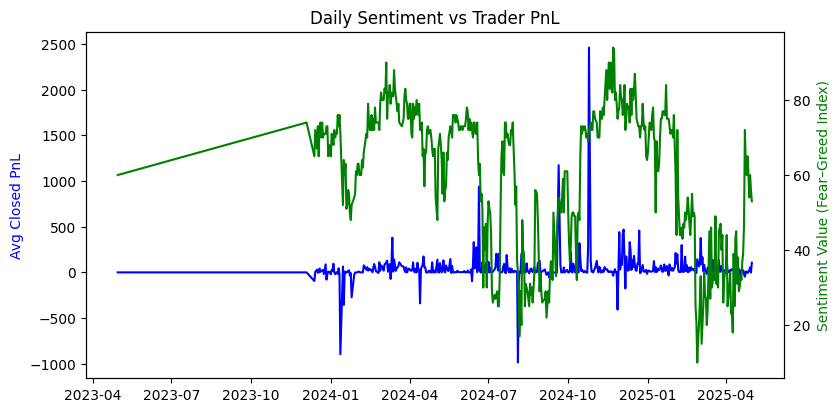

In [36]:
import matplotlib.pyplot as plt

# Daily aggregation
daily = merged.groupby("trade_date").agg({
    "Closed PnL": "mean",
    "value": "mean"
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(9,4.5))

ax1.plot(daily["trade_date"], daily["Closed PnL"], color="blue", label="Avg Closed PnL")
ax1.set_ylabel("Avg Closed PnL", color="blue")

ax2 = ax1.twinx()
ax2.plot(daily["trade_date"], daily["value"], color="green", label="Sentiment Value")
ax2.set_ylabel("Sentiment Value (Fear–Greed Index)", color="green")

plt.title("Daily Sentiment vs Trader PnL")
plt.show()

Boxplot → Closed PnL across Sentiment Classes (Fear, Neutral, Greed)

/tmp/ipython-input-2800654722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x="classification", y="Closed PnL", palette="Set2")


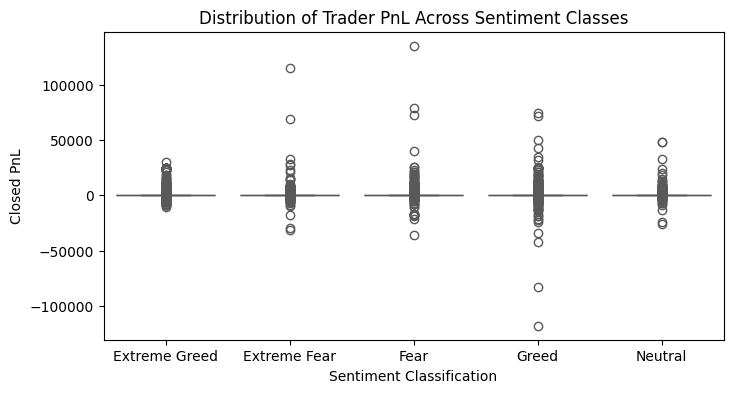

In [37]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(data=merged, x="classification", y="Closed PnL", palette="Set2")
plt.title("Distribution of Trader PnL Across Sentiment Classes")
plt.xlabel("Sentiment Classification")
plt.ylabel("Closed PnL")
plt.show()

Heatmap → Correlation Matrix (PnL, sentiment, size, side)

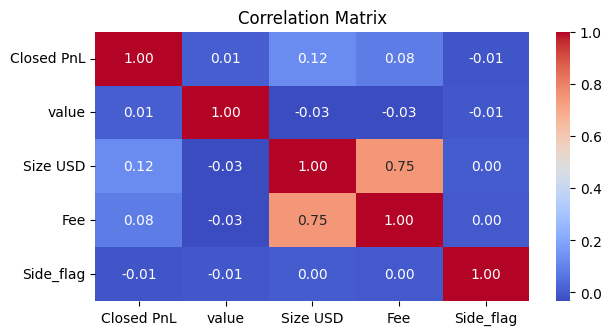

In [38]:
# Prepare numeric features
corr_data = merged[["Closed PnL", "value", "Size USD", "Fee"]].copy()
corr_data["Side_flag"] = (merged["Side"] == "BUY").astype(int)

# Correlation matrix
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(7,3.5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Delivering Insights**

In [39]:
df = merged
insight1 = df.groupby("classification")["Closed PnL"].mean().sort_values()
print(insight1)

classification
Neutral          32.472293
Fear             45.633528
Extreme Fear     49.759160
Greed            49.770705
Extreme Greed    64.109126
Name: Closed PnL, dtype: float64


Higher profits when trading against sentiment (contrarian)

In [40]:
def contrarian_pnl(row):
    if "Greed" in row["classification"]:
        return -row["Closed PnL"]
    else:
        return row["Closed PnL"]

df["contrarian_pnl"] = df.apply(contrarian_pnl, axis=1)

print("Avg Actual PnL:", df["Closed PnL"].mean())
print("Avg Contrarian PnL:", df["contrarian_pnl"].mean())

Avg Actual PnL: 48.09506037763757
Avg Contrarian PnL: 0.3385654056196879


Larger positions in Fear but higher variance

In [41]:
insight3 = df.groupby("classification").agg(
    avg_position_size=("Size USD", "mean"),
    pnl_variance=("Closed PnL", "var"),
    avg_pnl=("Closed PnL", "mean")
).sort_values("avg_position_size", ascending=False)

print(insight3)

                avg_position_size  pnl_variance    avg_pnl
classification                                            
Fear                  7707.579367  8.201404e+05  45.633528
Extreme Fear          5523.409181  1.372510e+06  49.759160
Greed                 5463.729197  1.380759e+06  49.770705
Neutral               4767.243553  3.166393e+05  32.472293
Extreme Greed         3148.643847  4.912512e+05  64.109126


Sentiment shifts → next-day profitability

In [42]:
df = df.sort_values("trade_date")

# Aggregate per day first (since multiple trades per day)
daily = df.groupby(["trade_date", "classification"]).agg(
    daily_pnl=("Closed PnL", "sum")
).reset_index()

# Shift by one day
daily["next_day_pnl"] = daily["daily_pnl"].shift(-1)

insight4 = daily.groupby("classification")["next_day_pnl"].mean()
print(insight4)

classification
Extreme Fear     69261.350943
Extreme Greed    23666.571115
Fear             33900.913141
Greed            12015.486891
Neutral          14598.035928
Name: next_day_pnl, dtype: float64


Final Visualization

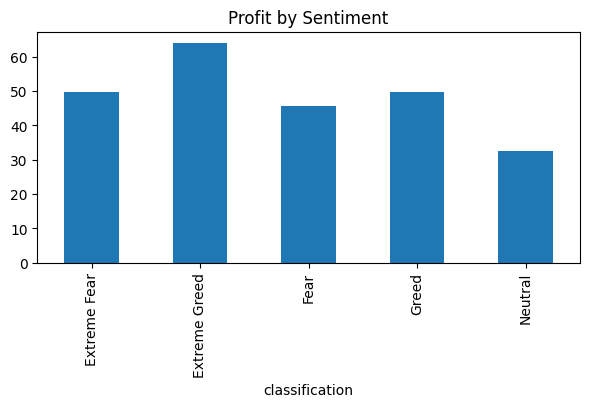

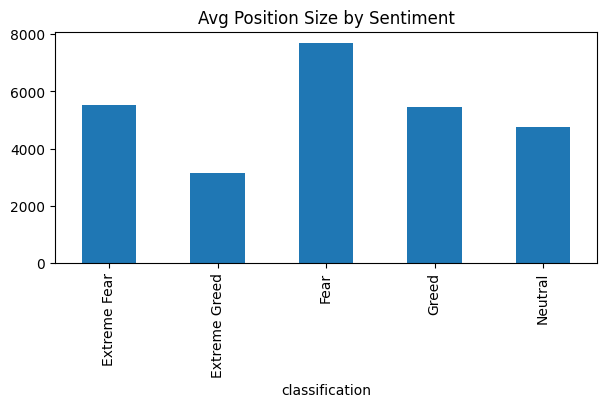

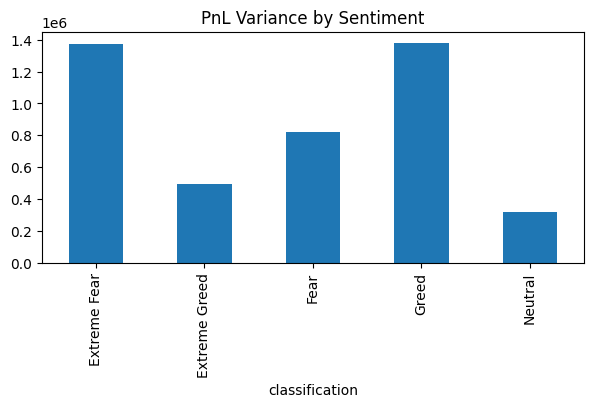

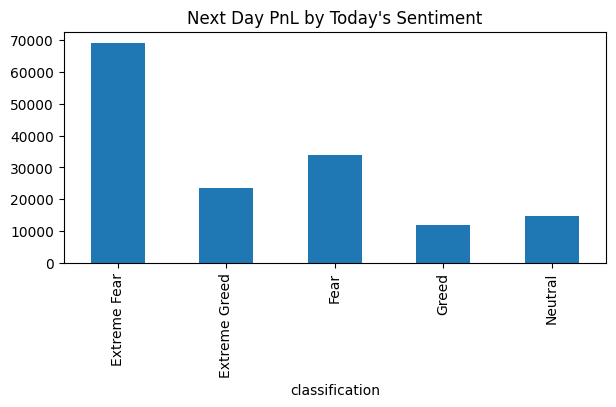

In [43]:
import matplotlib.pyplot as plt

# Profit by sentiment
plt.figure(figsize=(7,3))
df.groupby("classification")["Closed PnL"].mean().plot(kind="bar", title="Profit by Sentiment")
plt.show()
print("\n")

# Position size
plt.figure(figsize=(7,3))
df.groupby("classification")["Size USD"].mean().plot(kind="bar", title="Avg Position Size by Sentiment")
plt.show()
print("\n")

# Variance of PnL
plt.figure(figsize=(7,3))
df.groupby("classification")["Closed PnL"].var().plot(kind="bar", title="PnL Variance by Sentiment")
plt.show()
print("\n")

# Next-day predictability
plt.figure(figsize=(7,3))
insight4.plot(kind="bar", title="Next Day PnL by Today's Sentiment")
plt.show()

Extra for insights

In [44]:
# Count trades per coin
coin_counts = merged["Coin"].value_counts()

print("Top traded coins:")
print(coin_counts.head())

# If you want percentage share
coin_share = merged["Coin"].value_counts(normalize=True) * 100
print("\nTrade share (%) by coin:")
print(coin_share.head())

Top traded coins:
Coin
HYPE    66140
@107    29590
BTC     25059
ETH     10834
SOL     10405
Name: count, dtype: int64

Trade share (%) by coin:
Coin
HYPE    32.052960
@107    14.339992
BTC     12.144166
ETH      5.250405
SOL      5.042501
Name: proportion, dtype: float64


Trades by hour:
trade_hour
0      9633
1     10098
2      8029
3     10288
4      9762
5      9312
6      8798
7      8421
8      7670
9      6362
10     6621
11     6063
12     6825
13     8159
14     6721
15     7109
16     5783
17     6111
18     9398
19    12358
20    12455
21    10765
22     9802
23     9803
Name: count, dtype: int64




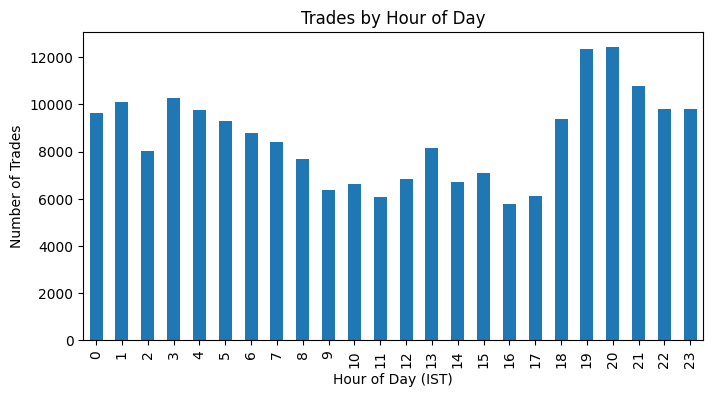

In [45]:
# Convert timestamp to datetime if not already
merged["Timestamp IST"] = pd.to_datetime(merged["Timestamp IST"], errors="coerce")

# Extract hour of day
merged["trade_hour"] = merged["Timestamp IST"].dt.hour

# Count trades per hour
hourly_counts = merged["trade_hour"].value_counts().sort_index()

print("Trades by hour:")
print(hourly_counts)
print("\n")
# Optional: Plot trades by hour
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
hourly_counts.plot(kind="bar")
plt.title("Trades by Hour of Day")
plt.xlabel("Hour of Day (IST)")
plt.ylabel("Number of Trades")
plt.show()